In [4]:
# 그럼 첫번째 레슨 : 라이브러리 불러오기

#필요한 딥러닝 관련 라이브러리를 불러옵니다.

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [5]:
# 🗂️ Step 2: 데이터 불러오기

#CIFAR-10 데이터셋을 불러오고, 학습용/테스트용으로 분리합니다.

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()


## 과제1. 데이터의 구조를 살펴보세요. 사이즈는?

In [6]:
# 여기에서 확인해 보세요.
print("train images shape: ", train_images.shape)
print("train labels shape: ", train_labels.shape)
print("test images shape: ", test_images.shape)
print("test labels shape: ", test_labels.shape)

train images shape:  (50000, 32, 32, 3)
train labels shape:  (50000, 1)
test images shape:  (10000, 32, 32, 3)
test labels shape:  (10000, 1)


In [7]:
# 🏷️ Step 3: 클래스 이름 정의

#CIFAR-10의 라벨은 숫자로 되어 있으므로, 사람이 이해할 수 있도록 이름을 부여합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

## 과제2. 아래 코드의 빈칸을 채워 CNN 모델을 완성해보세요. 
#### layer나 패딩 혹은 drop out, batch normalization을 추가해 가며 모델의 정확도 변화를 보는 것도 좋습니다.

In [8]:
# 🧱 Step 4: CNN 모델 구성
# Convolution → MaxPooling → Flatten → Dense 구조로 CNN을 설계합니다.
# 아래의 빈칸 (___)을 채워 모델을 완성해보세요.

model = models.Sequential()

# 첫 번째 합성곱 레이어
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))  # TODO: 커널 개수 설정

# 첫 번째 풀링 레이어
model.add(layers.MaxPooling2D((2, 2)))  # TODO: 풀링 크기 설정

# 두 번째 합성곱 레이어
model.add(layers.Conv2D(64, (3, 3), activation='relu'))  # TODO: 커널 크기 설정

# 두 번째 풀링 레이어
model.add(layers.MaxPooling2D((2, 2)))

# 세 번째 합성곱 레이어
model.add(layers.Conv2D(64, (3, 3), activation='relu'))  # TODO: 커널 개수 설정

# Flatten + Fully Connected Layer
model.add(layers.Flatten())
model.add(layers.Dense(64))  # TODO: 은닉층 유닛 수 설정
model.add(layers.Dense(10))  # 출력층: CIFAR-10은 클래스가 10개

## 자신이 채운 코드를 기반으로 각 레이어별 Feature Map 크기를 계산해 보세요. 
(padding은 디폴트로 없습니다.)

Answer: 

첫번째 합성곱 레이어를 통과한뒤 하나의 입력은 (30, 30, 32) 크기의 feature map을 생성하고 위 코드에 따라 stride가 2인 max pooling 과정을 거치면 (15, 15, 32)의 feature map이 생성된다. 

두번째 합서곱 레이어를 통과하면 (13, 13, 64) 크기의 feature map을 생성하고 위 코드에 따라 stride가 2인 max pooling 과정을 거치면 (6, 6, 64)의 feature map이 생성된다.

마지막 합성곱 레이어를 통과하면 (4, 4, 64)의 feature map을 생성한다.

이후 flatten을 통해 1024 크기를 갖게 되고 dense layer를 통과해 64, 최종 dense layer를 통과해 10이 된다.

In [9]:
# ⚙️ Step 5: 모델 컴파일

#모델을 학습할 수 있도록 컴파일합니다. 손실 함수, 최적화 방법, 평가지표를 설정합니다.

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Epoch 1/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.9810 - accuracy: 0.3259 - val_loss: 1.5458 - val_accuracy: 0.4358
Epoch 2/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.4448 - accuracy: 0.4779 - val_loss: 1.4002 - val_accuracy: 0.5043
Epoch 3/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.2953 - accuracy: 0.5429 - val_loss: 1.2533 - val_accuracy: 0.5535
Epoch 4/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.1865 - accuracy: 0.5847 - val_loss: 1.1688 - val_accuracy: 0.5944
Epoch 5/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.1038 - accuracy: 0.6141 - val_loss: 1.1535 - val_accuracy: 0.5948
Epoch 6/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.0340 - accuracy: 0.6387 - val_loss: 1.1231 - val_accuracy: 0.6156
Epoch 7/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.9735 - accuracy: 0.6615 - val_loss: 1.1111 -

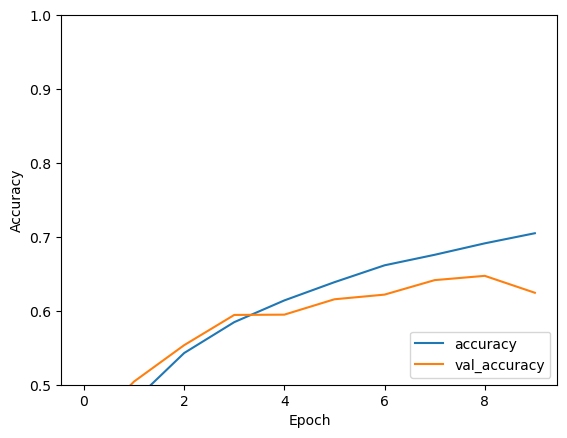

In [40]:
# 🔥 Step 6: 모델 학습 및 성능 평가

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))
#모델 성능 평가
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,
                                     test_labels,
                                     verbose=2)


In [41]:
print('Test Accuracy is',test_acc)

Test Accuracy is 0.6244000196456909


## 과제3. 직접사용해 보기. 이미지를 로드하고 cifar-10의 사이즈로 리사이즈

1/1 [==============================] - 0s 149ms/step


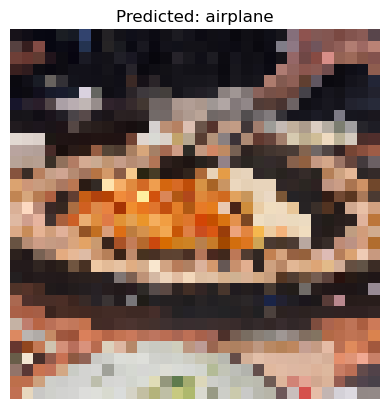

In [12]:
import numpy as np
from tensorflow.keras.preprocessing import image

# 새 이미지를 로드하고 모델 예측 수행
def predict_new_image(image_path, model, class_names):
    # 이미지 로드 및 전처리
    img = image.load_img(image_path, target_size=(32, 32, 3))  # CIFAR-10 크기로 리사이즈 빈칸채우기
    img_array = image.img_to_array(img)  # 이미지를 배열로 변환
    img_array = np.expand_dims(img_array, axis=0)  # 배치를 위해 차원 추가
    img_array = img_array / 255.0  # 정규화 

    # 예측 수행
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)  # 가장 높은 확률의 클래스 인덱스
    class_name = class_names[predicted_class]  # 클래스 이름

    # 결과 출력
    plt.imshow(img)
    plt.title(f"Predicted: {class_name}")
    plt.axis('off')
    plt.show()

# 사용 예시
image_path = "/Users/yoonsjin/BOAZ/1주차/IMG_3294.jpeg"  # 예측할 이미지의 경로 절대경로를 입력하면 됩니다. 뭔가 자신의 얼굴사진을 넣어보면 재미있는일이...
predict_new_image(image_path, model, class_names)


## 왜 255.0으로 나누었을까요? 이미지 전처리에 대한 지식이니 조사해보세요.

Answer: 

이미지의 픽셀은 0부터 255 사이의 값으로 표현되는데 이 값을 그대로 쓸 경우 입력 값의 스케일이 너무 커 학습이 느려지거나 다양한 문제가 발생할 수 있기 때문에 학습을 더 빨리하고 gradient 계산을 안정화하기 위해 모든 값을 255로 나눠 0과 1 사이 값으로 정규화한다.

## 과제4. CNN의 inductive bias에 대해서 조사를 해보고 생각해 봅시다.
### CNN은 왜 이미지 처리에 좋을까요? 이미지 말고도 CNN을 잘 쓸 수 있는데는 어디일까요?

Answer:

CNN의 inductive bias에는 두가지가 있다. 

첫번째는 Locality이다. 서로 이웃한 값들끼리는 연관성이 존재한다는 가정이다. CNN은 이미지의 작은 영역에 대해서만 filter를 적용해 서로 이웃한 값들끼리에서만 패턴의 존재 여부를 판단하고 이를 점점 큰 특징으로 확장해 나간다. 

두번째는 Spatial invariance이다. 입력이 바뀌얻도 관계가 유지된다는 가정이다. 즉, 패턴이 이미지의 어느 위치에 있던지 동일하게 인식한다. 이는 CNN의 parameter sharing을 통해 나타난다. 필터의 패턴을 표현하는 가중치는 이미지 전체의 어떤 부분에 대해서도 동일하게 적용된다.

음성 인식이나 오디오 처리 분야에서도 이미지와 유사하게 어떤 시점에 나타나더라도 같은 의미를 가지는 패턴이 존재하고 서로 인접한 음성 데이터들이 연관성을 갖기 때문에 CNN을 잘 적용할 수 있는 분야라고 생각한다. 